# Create the right plots for my thesis

Note this uses monty to load the plots but saves them manually (overwriting previous plots)

In [3]:
%matplotlib inline

from .libraries.monty import Monty, Monty11, loadraw
import numpy as np
from thesis_plots import *

ImportError: attempted relative import with no known parent package

[2024-09-22 09:51:20,135] INFO Loading existing experiment (ignoring given experiment parameters)
[2024-09-22 09:51:20,135] INFO Loading existing experiment (ignoring given experiment parameters)
[2024-09-22 09:51:20,135] INFO Loading existing experiment (ignoring given experiment parameters)
[2024-09-22 09:51:20,135] INFO Loading existing experiment (ignoring given experiment parameters)
[2024-09-22 09:51:20,135] INFO Loading existing experiment (ignoring given experiment parameters)
[2024-09-22 09:51:21,324] WARNING Note that no experimental data has been loaded.
[2024-09-22 09:51:21,324] WARNING Note that no experimental data has been loaded.
[2024-09-22 09:51:21,324] WARNING Note that no experimental data has been loaded.
[2024-09-22 09:51:21,324] WARNING Note that no experimental data has been loaded.
[2024-09-22 09:51:21,324] WARNING Note that no experimental data has been loaded.
[2024-09-22 09:51:21,328] INFO Next run will have id 466
[2024-09-22 09:51:21,328] INFO Next run wil

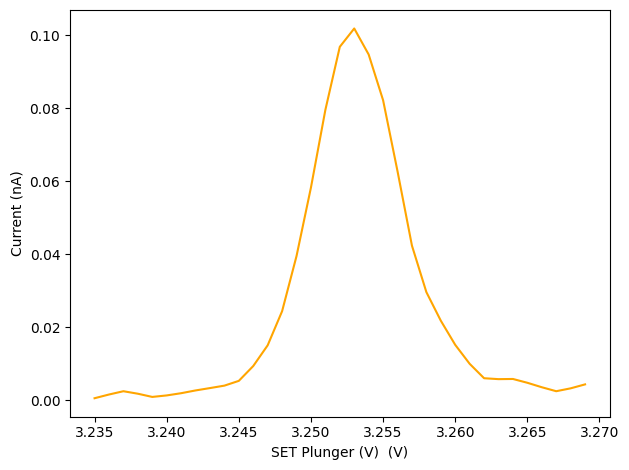

In [13]:
monty = Monty("dc.power_recovery")
result = monty.loadrun("1D_SET_sweep.7")
range = slice(35, 70)
X = np.linspace(3.2, 3.3, 101)[range]
Y = result["R"][range] * 1e9
oned_plot(X, Y, xlabel=ST + "  (V)", ylabel="Current (nA)", fname="1_peaks")

In [19]:
monty= Monty("rf.set_testing")
result = monty.loadrun("spectroscopy")

[2024-09-22 12:31:07,369] INFO Loading existing experiment (ignoring given experiment parameters)
[2024-09-22 12:31:07,369] INFO Loading existing experiment (ignoring given experiment parameters)
[2024-09-22 12:31:07,369] INFO Loading existing experiment (ignoring given experiment parameters)
[2024-09-22 12:31:07,369] INFO Loading existing experiment (ignoring given experiment parameters)
[2024-09-22 12:31:07,369] INFO Loading existing experiment (ignoring given experiment parameters)
[2024-09-22 12:31:07,369] INFO Loading existing experiment (ignoring given experiment parameters)
[2024-09-22 12:31:07,369] INFO Loading existing experiment (ignoring given experiment parameters)
[2024-09-22 12:31:07,369] INFO Loading existing experiment (ignoring given experiment parameters)
[2024-09-22 12:31:07,731] WARNING Note that no experimental data has been loaded.
[2024-09-22 12:31:07,731] WARNING Note that no experimental data has been loaded.
[2024-09-22 12:31:07,731] WARNING Note that no exper

In [22]:
result["data"].shape

(401,)

In [33]:
monty = Monty("sam.load_e2")
result = monty.loaddata("P1_scan.7")

[2024-09-24 14:04:37,212] INFO Loading existing experiment (ignoring given experiment parameters)
[2024-09-24 14:04:37,212] INFO Loading existing experiment (ignoring given experiment parameters)
[2024-09-24 14:04:37,212] INFO Loading existing experiment (ignoring given experiment parameters)
[2024-09-24 14:04:37,212] INFO Loading existing experiment (ignoring given experiment parameters)
[2024-09-24 14:04:37,212] INFO Loading existing experiment (ignoring given experiment parameters)
[2024-09-24 14:04:37,212] INFO Loading existing experiment (ignoring given experiment parameters)
[2024-09-24 14:04:37,212] INFO Loading existing experiment (ignoring given experiment parameters)
[2024-09-24 14:04:37,212] INFO Loading existing experiment (ignoring given experiment parameters)
[2024-09-24 14:04:37,212] INFO Loading existing experiment (ignoring given experiment parameters)
[2024-09-24 14:04:37,212] INFO Loading existing experiment (ignoring given experiment parameters)
[2024-09-24 14:04:37

In [34]:
monty.parameters

{'desc': '1D sweep of P1 (with proportional feedback techniques)',
 'lockin_amplitude': 'Set to 10uV',
 'ST': 'Fixed at 3.852381V (target of 1.6e-10 on lockin)',
 'SLB': 'Fixed at 0.949997V',
 'SRB': 'Fixed at 0.950002V',
 'SETB': 'Fixed at 0.0V',
 'J1': 'Fixed at 3.500004V',
 'P1': 'Ranged from 2.1V -> 1.75V in 100 points',
 'P2': 'Fixed at 1.749995V',
 'temp': 'Mixing chamber 0.0137773 K'}

In [35]:
result["R"].shape

(600,)